In [1]:
# Uses the New Batch of Photos
# Uses RMSPROP Optimizer
# I preprocessed my own images with my own code, not using the Keras preprocessing package

In [2]:
# import all the packages that are needed
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import PIL
from PIL import Image
#import cv2
from os import listdir
import skimage
from skimage import transform
from skimage import data
from keras.utils import to_categorical
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.models import Sequential
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
from time import time
from tensorflow.python.keras.callbacks import TensorBoard

In [4]:
def image_flipper():
    normal_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Normal'
    down_syndrome_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Down'
    williams_syndrome_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Williams'
    

    normal_filenames = []
    for f in listdir(normal_photo_base_path):
        normal_filenames.append(normal_photo_base_path + '\\' + f) # appends the path of the picture to a list
        
        if len(normal_filenames) <= 53:
            image = cv2.imread(normal_photo_base_path + '\\' + f)
            image = cv2.resize(image, (244,244))
            flipped_image = cv2.flip(image, 1)
        #    path = r'Z:\Share\DownSyndrome\4. All Photo\\Normal_Flipped\\' + f + '_flipped' + '.jpg' 
            cv2.imwrite(path, flipped_image)
            

    down_filenames = []
    for f in listdir(down_syndrome_photo_base_path):
        down_filenames.append(down_syndrome_photo_base_path + '\\' + f) # appends the path of the picture to a list
        
        if len(down_filenames) <= 2270:
            image = cv2.imread(down_syndrome_photo_base_path + '\\' + f)
        try:
            image = cv2.resize(image, (244,244))
        except:
            print(path)
        flipped_image = cv2.flip(image, 1)
        #path = r'Z:\\Share\DownSyndrome\\4. All Photo\\Down_Flipped\\' + f[:-4] + '_flipped' + '.jpg' 
        cv2.imwrite(path, flipped_image)
        
        

    williams_filenames = []
    for f in listdir(williams_syndrome_photo_base_path):
        if f == 'desktop.ini':
            pass
        else:
            williams_filenames.append(williams_syndrome_photo_base_path + '\\' + f) # appends the path of the picture to a list
        
        #path = r'Z:\\Share\\DownSyndrome\\4. All Photo\\Williams_Flipped\\' + f[:-4] + '_flipped' + '.jpg' 
        image = cv2.imread(williams_syndrome_photo_base_path + '\\' + f)
        try:
            image = cv2.resize(image, (244,244))
        except:
            print(path)
        flipped_image = cv2.flip(image, 1)
        
        cv2.imwrite(path, flipped_image)

In [5]:
def CNN_Preprocess():
    '''
    This functions runs the preprocessing for the images (resizes and converts to a numpy array)
    '''
    
    normal_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Normal'
    down_syndrome_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Down'
    williams_syndrome_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Williams'
    

    normal_filenames = []
    for f in listdir(normal_photo_base_path):
        normal_filenames.append(normal_photo_base_path + '\\' + f) # appends the path of the picture to a list
            

    down_filenames = []
    for f in listdir(down_syndrome_photo_base_path):
        down_filenames.append(down_syndrome_photo_base_path + '\\' + f) # appends the path of the picture to a list
        

    williams_filenames = []
    for f in listdir(williams_syndrome_photo_base_path):
        if f == 'desktop.ini':
            pass
        else:
            williams_filenames.append(williams_syndrome_photo_base_path + '\\' + f) # appends the path of the picture to a list


    image_filenames = normal_filenames + down_filenames + williams_filenames # combines all the image paths together

    normal_label = 0 # labels
    down_label = 1 # labels
    williams_label = 2 # labels

    global number_of_images_each
    number_of_images_each = {'total':0, 'normal':0, 'down':0, 'williams':0}
    number_of_images_each['total'] = len(image_filenames)
    number_of_images_each['normal'] = len(normal_filenames)
    number_of_images_each['down'] = len(down_filenames)
    number_of_images_each['williams'] = len(williams_filenames)
    
    global images
    images = []

    normal_labels = [normal_label] * len(normal_filenames)          # generates labels for the normal images
    down_labels = [down_label] * len(down_filenames)                # generates labels for the down images
    williams_labels = [williams_label] * len(williams_filenames)    # generates labels for the williams images

    labels = normal_labels + down_labels + williams_labels          # adds all the labels together into a single list
    labels = np.array(labels)                                       # converts the list into a numpy array
        
    counter = 1
    for image in image_filenames:
        image_photo = Image.open(image)                                      # reads the image into memory
        resized_image = image_photo.resize((244,244), PIL.Image.ANTIALIAS)   # resizes the image to 244 by 244
        resized_image.save(image,"PNG")                                      # saves the resized image

        images.append(skimage.data.load(image))                              # loads the image as a numpy array
        print('Preprocessing Images for CNN...on image ' + str(counter))     # prints this line for debugging
        
        if skimage.data.load(image).shape == (244, 244, 3):                  # prints this for debugging
            print('true')                                                    # prints this for debugging
        else:
            print('false')                                                   # prints this for debugging
            print(image)                                                     # prints this for debugging
            print(skimage.data.load(image).shape)                            # prints this for debugging

        counter = counter + 1

    images = np.stack(images, axis=0)                              # conbines all the numpy arrays into a single one
    
    #images.dump('X_newphotos.npy')                                # saves the images array
    #labels.dump('y_newphotos.npy')                                # saves the labels array
    
    return images, labels

In [11]:
X, y = CNN_Preprocess()
#X = np.load('X_newphotos.npy')            # loads the saved images numpy array
#y = np.load('y_newphotos.npy')            # loads the saved labels numpy array

Preprocessing Images for CNN...on image 1
true
Preprocessing Images for CNN...on image 2
true
Preprocessing Images for CNN...on image 3
true
Preprocessing Images for CNN...on image 4
true
Preprocessing Images for CNN...on image 5
true
Preprocessing Images for CNN...on image 6
true
Preprocessing Images for CNN...on image 7
true
Preprocessing Images for CNN...on image 8
true
Preprocessing Images for CNN...on image 9
true
Preprocessing Images for CNN...on image 10
true
Preprocessing Images for CNN...on image 11
true
Preprocessing Images for CNN...on image 12
true
Preprocessing Images for CNN...on image 13
true
Preprocessing Images for CNN...on image 14
true
Preprocessing Images for CNN...on image 15
true
Preprocessing Images for CNN...on image 16
true
Preprocessing Images for CNN...on image 17
true
Preprocessing Images for CNN...on image 18
true
Preprocessing Images for CNN...on image 19
true
Preprocessing Images for CNN...on image 20
true
Preprocessing Images for CNN...on image 21
true
P

Preprocessing Images for CNN...on image 173
true
Preprocessing Images for CNN...on image 174
true
Preprocessing Images for CNN...on image 175
true
Preprocessing Images for CNN...on image 176
true
Preprocessing Images for CNN...on image 177
true
Preprocessing Images for CNN...on image 178
true
Preprocessing Images for CNN...on image 179
true
Preprocessing Images for CNN...on image 180
true
Preprocessing Images for CNN...on image 181
true
Preprocessing Images for CNN...on image 182
true
Preprocessing Images for CNN...on image 183
true
Preprocessing Images for CNN...on image 184
true
Preprocessing Images for CNN...on image 185
true
Preprocessing Images for CNN...on image 186
true
Preprocessing Images for CNN...on image 187
true
Preprocessing Images for CNN...on image 188
true
Preprocessing Images for CNN...on image 189
true
Preprocessing Images for CNN...on image 190
true
Preprocessing Images for CNN...on image 191
true
Preprocessing Images for CNN...on image 192
true
Preprocessing Images

true
Preprocessing Images for CNN...on image 347
true
Preprocessing Images for CNN...on image 348
true
Preprocessing Images for CNN...on image 349
true
Preprocessing Images for CNN...on image 350
true
Preprocessing Images for CNN...on image 351
true
Preprocessing Images for CNN...on image 352
true
Preprocessing Images for CNN...on image 353
true
Preprocessing Images for CNN...on image 354
true
Preprocessing Images for CNN...on image 355
true
Preprocessing Images for CNN...on image 356
true
Preprocessing Images for CNN...on image 357
true
Preprocessing Images for CNN...on image 358
true
Preprocessing Images for CNN...on image 359
true
Preprocessing Images for CNN...on image 360
true
Preprocessing Images for CNN...on image 361
true
Preprocessing Images for CNN...on image 362
true
Preprocessing Images for CNN...on image 363
true
Preprocessing Images for CNN...on image 364
true
Preprocessing Images for CNN...on image 365
true
Preprocessing Images for CNN...on image 366
true
Preprocessing I

true
Preprocessing Images for CNN...on image 517
true
Preprocessing Images for CNN...on image 518
true
Preprocessing Images for CNN...on image 519
true
Preprocessing Images for CNN...on image 520
true
Preprocessing Images for CNN...on image 521
true
Preprocessing Images for CNN...on image 522
true
Preprocessing Images for CNN...on image 523
true
Preprocessing Images for CNN...on image 524
true
Preprocessing Images for CNN...on image 525
true
Preprocessing Images for CNN...on image 526
true
Preprocessing Images for CNN...on image 527
true
Preprocessing Images for CNN...on image 528
true
Preprocessing Images for CNN...on image 529
true
Preprocessing Images for CNN...on image 530
true
Preprocessing Images for CNN...on image 531
true
Preprocessing Images for CNN...on image 532
true
Preprocessing Images for CNN...on image 533
true
Preprocessing Images for CNN...on image 534
true
Preprocessing Images for CNN...on image 535
true
Preprocessing Images for CNN...on image 536
true
Preprocessing I

true
Preprocessing Images for CNN...on image 689
true
Preprocessing Images for CNN...on image 690
true
Preprocessing Images for CNN...on image 691
true
Preprocessing Images for CNN...on image 692
true
Preprocessing Images for CNN...on image 693
true
Preprocessing Images for CNN...on image 694
true
Preprocessing Images for CNN...on image 695
true
Preprocessing Images for CNN...on image 696
true
Preprocessing Images for CNN...on image 697
true
Preprocessing Images for CNN...on image 698
true
Preprocessing Images for CNN...on image 699
true
Preprocessing Images for CNN...on image 700
true
Preprocessing Images for CNN...on image 701
true
Preprocessing Images for CNN...on image 702
true
Preprocessing Images for CNN...on image 703
true
Preprocessing Images for CNN...on image 704
true
Preprocessing Images for CNN...on image 705
true
Preprocessing Images for CNN...on image 706
true
Preprocessing Images for CNN...on image 707
true
Preprocessing Images for CNN...on image 708
true
Preprocessing I

true
Preprocessing Images for CNN...on image 857
true
Preprocessing Images for CNN...on image 858
true
Preprocessing Images for CNN...on image 859
true
Preprocessing Images for CNN...on image 860
true
Preprocessing Images for CNN...on image 861
true
Preprocessing Images for CNN...on image 862
true
Preprocessing Images for CNN...on image 863
true
Preprocessing Images for CNN...on image 864
true
Preprocessing Images for CNN...on image 865
true
Preprocessing Images for CNN...on image 866
true
Preprocessing Images for CNN...on image 867
true
Preprocessing Images for CNN...on image 868
true
Preprocessing Images for CNN...on image 869
true
Preprocessing Images for CNN...on image 870
true
Preprocessing Images for CNN...on image 871
true
Preprocessing Images for CNN...on image 872
true
Preprocessing Images for CNN...on image 873
true
Preprocessing Images for CNN...on image 874
true
Preprocessing Images for CNN...on image 875
true
Preprocessing Images for CNN...on image 876
true
Preprocessing I

Preprocessing Images for CNN...on image 1029
true
Preprocessing Images for CNN...on image 1030
true
Preprocessing Images for CNN...on image 1031
true
Preprocessing Images for CNN...on image 1032
true
Preprocessing Images for CNN...on image 1033
true
Preprocessing Images for CNN...on image 1034
true
Preprocessing Images for CNN...on image 1035
true
Preprocessing Images for CNN...on image 1036
true
Preprocessing Images for CNN...on image 1037
true
Preprocessing Images for CNN...on image 1038
true
Preprocessing Images for CNN...on image 1039
true
Preprocessing Images for CNN...on image 1040
true
Preprocessing Images for CNN...on image 1041
true
Preprocessing Images for CNN...on image 1042
true
Preprocessing Images for CNN...on image 1043
true
Preprocessing Images for CNN...on image 1044
true
Preprocessing Images for CNN...on image 1045
true
Preprocessing Images for CNN...on image 1046
true
Preprocessing Images for CNN...on image 1047
true
Preprocessing Images for CNN...on image 1048
true


Preprocessing Images for CNN...on image 1197
true
Preprocessing Images for CNN...on image 1198
true
Preprocessing Images for CNN...on image 1199
true
Preprocessing Images for CNN...on image 1200
true
Preprocessing Images for CNN...on image 1201
true
Preprocessing Images for CNN...on image 1202
true
Preprocessing Images for CNN...on image 1203
true
Preprocessing Images for CNN...on image 1204
true
Preprocessing Images for CNN...on image 1205
true
Preprocessing Images for CNN...on image 1206
true
Preprocessing Images for CNN...on image 1207
true
Preprocessing Images for CNN...on image 1208
true
Preprocessing Images for CNN...on image 1209
true
Preprocessing Images for CNN...on image 1210
true
Preprocessing Images for CNN...on image 1211
true
Preprocessing Images for CNN...on image 1212
true
Preprocessing Images for CNN...on image 1213
true
Preprocessing Images for CNN...on image 1214
true
Preprocessing Images for CNN...on image 1215
true
Preprocessing Images for CNN...on image 1216
true


true
Preprocessing Images for CNN...on image 1367
true
Preprocessing Images for CNN...on image 1368
true
Preprocessing Images for CNN...on image 1369
true
Preprocessing Images for CNN...on image 1370
true
Preprocessing Images for CNN...on image 1371
true
Preprocessing Images for CNN...on image 1372
true
Preprocessing Images for CNN...on image 1373
true
Preprocessing Images for CNN...on image 1374
true
Preprocessing Images for CNN...on image 1375
true
Preprocessing Images for CNN...on image 1376
true
Preprocessing Images for CNN...on image 1377
true
Preprocessing Images for CNN...on image 1378
true
Preprocessing Images for CNN...on image 1379
true
Preprocessing Images for CNN...on image 1380
true
Preprocessing Images for CNN...on image 1381
true
Preprocessing Images for CNN...on image 1382
true
Preprocessing Images for CNN...on image 1383
true
Preprocessing Images for CNN...on image 1384
true
Preprocessing Images for CNN...on image 1385
true
Preprocessing Images for CNN...on image 1386


Preprocessing Images for CNN...on image 1530
true
Preprocessing Images for CNN...on image 1531
true
Preprocessing Images for CNN...on image 1532
true
Preprocessing Images for CNN...on image 1533
true
Preprocessing Images for CNN...on image 1534
true
Preprocessing Images for CNN...on image 1535
true
Preprocessing Images for CNN...on image 1536
true
Preprocessing Images for CNN...on image 1537
true
Preprocessing Images for CNN...on image 1538
true
Preprocessing Images for CNN...on image 1539
true
Preprocessing Images for CNN...on image 1540
true
Preprocessing Images for CNN...on image 1541
true
Preprocessing Images for CNN...on image 1542
true
Preprocessing Images for CNN...on image 1543
true
Preprocessing Images for CNN...on image 1544
true
Preprocessing Images for CNN...on image 1545
true
Preprocessing Images for CNN...on image 1546
true
Preprocessing Images for CNN...on image 1547
true
Preprocessing Images for CNN...on image 1548
true
Preprocessing Images for CNN...on image 1549
true


true
Preprocessing Images for CNN...on image 1698
true
Preprocessing Images for CNN...on image 1699
true
Preprocessing Images for CNN...on image 1700
true
Preprocessing Images for CNN...on image 1701
true
Preprocessing Images for CNN...on image 1702
true
Preprocessing Images for CNN...on image 1703
true
Preprocessing Images for CNN...on image 1704
true
Preprocessing Images for CNN...on image 1705
true
Preprocessing Images for CNN...on image 1706
true
Preprocessing Images for CNN...on image 1707
true
Preprocessing Images for CNN...on image 1708
true
Preprocessing Images for CNN...on image 1709
true
Preprocessing Images for CNN...on image 1710
true
Preprocessing Images for CNN...on image 1711
true
Preprocessing Images for CNN...on image 1712
true
Preprocessing Images for CNN...on image 1713
true
Preprocessing Images for CNN...on image 1714
true
Preprocessing Images for CNN...on image 1715
true
Preprocessing Images for CNN...on image 1716
true
Preprocessing Images for CNN...on image 1717


Preprocessing Images for CNN...on image 1862
true
Preprocessing Images for CNN...on image 1863
true
Preprocessing Images for CNN...on image 1864
true
Preprocessing Images for CNN...on image 1865
true
Preprocessing Images for CNN...on image 1866
true
Preprocessing Images for CNN...on image 1867
true
Preprocessing Images for CNN...on image 1868
true
Preprocessing Images for CNN...on image 1869
true
Preprocessing Images for CNN...on image 1870
true
Preprocessing Images for CNN...on image 1871
true
Preprocessing Images for CNN...on image 1872
true
Preprocessing Images for CNN...on image 1873
true
Preprocessing Images for CNN...on image 1874
true
Preprocessing Images for CNN...on image 1875
true
Preprocessing Images for CNN...on image 1876
true
Preprocessing Images for CNN...on image 1877
true
Preprocessing Images for CNN...on image 1878
true
Preprocessing Images for CNN...on image 1879
true
Preprocessing Images for CNN...on image 1880
true
Preprocessing Images for CNN...on image 1881
true


Preprocessing Images for CNN...on image 2027
true
Preprocessing Images for CNN...on image 2028
true
Preprocessing Images for CNN...on image 2029
true
Preprocessing Images for CNN...on image 2030
true
Preprocessing Images for CNN...on image 2031
true
Preprocessing Images for CNN...on image 2032
true
Preprocessing Images for CNN...on image 2033
true
Preprocessing Images for CNN...on image 2034
true
Preprocessing Images for CNN...on image 2035
true
Preprocessing Images for CNN...on image 2036
true
Preprocessing Images for CNN...on image 2037
true
Preprocessing Images for CNN...on image 2038
true
Preprocessing Images for CNN...on image 2039
true
Preprocessing Images for CNN...on image 2040
true
Preprocessing Images for CNN...on image 2041
true
Preprocessing Images for CNN...on image 2042
true
Preprocessing Images for CNN...on image 2043
true
Preprocessing Images for CNN...on image 2044
true
Preprocessing Images for CNN...on image 2045
true
Preprocessing Images for CNN...on image 2046
true


Preprocessing Images for CNN...on image 2192
true
Preprocessing Images for CNN...on image 2193
true
Preprocessing Images for CNN...on image 2194
true
Preprocessing Images for CNN...on image 2195
true
Preprocessing Images for CNN...on image 2196
true
Preprocessing Images for CNN...on image 2197
true
Preprocessing Images for CNN...on image 2198
true
Preprocessing Images for CNN...on image 2199
true
Preprocessing Images for CNN...on image 2200
true
Preprocessing Images for CNN...on image 2201
true
Preprocessing Images for CNN...on image 2202
true
Preprocessing Images for CNN...on image 2203
true
Preprocessing Images for CNN...on image 2204
true
Preprocessing Images for CNN...on image 2205
true
Preprocessing Images for CNN...on image 2206
true
Preprocessing Images for CNN...on image 2207
true
Preprocessing Images for CNN...on image 2208
true
Preprocessing Images for CNN...on image 2209
true
Preprocessing Images for CNN...on image 2210
true
Preprocessing Images for CNN...on image 2211
true


Preprocessing Images for CNN...on image 2357
true
Preprocessing Images for CNN...on image 2358
true
Preprocessing Images for CNN...on image 2359
true
Preprocessing Images for CNN...on image 2360
true
Preprocessing Images for CNN...on image 2361
true
Preprocessing Images for CNN...on image 2362
true
Preprocessing Images for CNN...on image 2363
true
Preprocessing Images for CNN...on image 2364
true
Preprocessing Images for CNN...on image 2365
true
Preprocessing Images for CNN...on image 2366
true
Preprocessing Images for CNN...on image 2367
true
Preprocessing Images for CNN...on image 2368
true
Preprocessing Images for CNN...on image 2369
true
Preprocessing Images for CNN...on image 2370
true
Preprocessing Images for CNN...on image 2371
true
Preprocessing Images for CNN...on image 2372
true
Preprocessing Images for CNN...on image 2373
true
Preprocessing Images for CNN...on image 2374
true
Preprocessing Images for CNN...on image 2375
true
Preprocessing Images for CNN...on image 2376
true


true
Preprocessing Images for CNN...on image 2527
true
Preprocessing Images for CNN...on image 2528
true
Preprocessing Images for CNN...on image 2529
true
Preprocessing Images for CNN...on image 2530
true
Preprocessing Images for CNN...on image 2531
true
Preprocessing Images for CNN...on image 2532
true
Preprocessing Images for CNN...on image 2533
true
Preprocessing Images for CNN...on image 2534
true
Preprocessing Images for CNN...on image 2535
true
Preprocessing Images for CNN...on image 2536
true
Preprocessing Images for CNN...on image 2537
true
Preprocessing Images for CNN...on image 2538
true
Preprocessing Images for CNN...on image 2539
true
Preprocessing Images for CNN...on image 2540
true
Preprocessing Images for CNN...on image 2541
true
Preprocessing Images for CNN...on image 2542
true
Preprocessing Images for CNN...on image 2543
true
Preprocessing Images for CNN...on image 2544
true
Preprocessing Images for CNN...on image 2545
true
Preprocessing Images for CNN...on image 2546


true
Preprocessing Images for CNN...on image 2691
true
Preprocessing Images for CNN...on image 2692
true
Preprocessing Images for CNN...on image 2693
true
Preprocessing Images for CNN...on image 2694
true
Preprocessing Images for CNN...on image 2695
true
Preprocessing Images for CNN...on image 2696
true
Preprocessing Images for CNN...on image 2697
true
Preprocessing Images for CNN...on image 2698
true
Preprocessing Images for CNN...on image 2699
true
Preprocessing Images for CNN...on image 2700
true
Preprocessing Images for CNN...on image 2701
true
Preprocessing Images for CNN...on image 2702
true
Preprocessing Images for CNN...on image 2703
true
Preprocessing Images for CNN...on image 2704
true
Preprocessing Images for CNN...on image 2705
true
Preprocessing Images for CNN...on image 2706
true
Preprocessing Images for CNN...on image 2707
true
Preprocessing Images for CNN...on image 2708
true
Preprocessing Images for CNN...on image 2709
true
Preprocessing Images for CNN...on image 2710


true
Preprocessing Images for CNN...on image 2857
true
Preprocessing Images for CNN...on image 2858
true
Preprocessing Images for CNN...on image 2859
true
Preprocessing Images for CNN...on image 2860
true
Preprocessing Images for CNN...on image 2861
true
Preprocessing Images for CNN...on image 2862
true
Preprocessing Images for CNN...on image 2863
true
Preprocessing Images for CNN...on image 2864
true
Preprocessing Images for CNN...on image 2865
true
Preprocessing Images for CNN...on image 2866
true
Preprocessing Images for CNN...on image 2867
true
Preprocessing Images for CNN...on image 2868
true
Preprocessing Images for CNN...on image 2869
true
Preprocessing Images for CNN...on image 2870
true
Preprocessing Images for CNN...on image 2871
true
Preprocessing Images for CNN...on image 2872
true
Preprocessing Images for CNN...on image 2873
true
Preprocessing Images for CNN...on image 2874
true
Preprocessing Images for CNN...on image 2875
true
Preprocessing Images for CNN...on image 2876


true
Preprocessing Images for CNN...on image 3024
true
Preprocessing Images for CNN...on image 3025
true
Preprocessing Images for CNN...on image 3026
true
Preprocessing Images for CNN...on image 3027
true
Preprocessing Images for CNN...on image 3028
true
Preprocessing Images for CNN...on image 3029
true
Preprocessing Images for CNN...on image 3030
true
Preprocessing Images for CNN...on image 3031
true
Preprocessing Images for CNN...on image 3032
true
Preprocessing Images for CNN...on image 3033
true
Preprocessing Images for CNN...on image 3034
true
Preprocessing Images for CNN...on image 3035
true
Preprocessing Images for CNN...on image 3036
true
Preprocessing Images for CNN...on image 3037
true
Preprocessing Images for CNN...on image 3038
true
Preprocessing Images for CNN...on image 3039
true
Preprocessing Images for CNN...on image 3040
true
Preprocessing Images for CNN...on image 3041
true
Preprocessing Images for CNN...on image 3042
true
Preprocessing Images for CNN...on image 3043


Preprocessing Images for CNN...on image 3190
true
Preprocessing Images for CNN...on image 3191
true
Preprocessing Images for CNN...on image 3192
true
Preprocessing Images for CNN...on image 3193
true
Preprocessing Images for CNN...on image 3194
true
Preprocessing Images for CNN...on image 3195
true
Preprocessing Images for CNN...on image 3196
true
Preprocessing Images for CNN...on image 3197
true
Preprocessing Images for CNN...on image 3198
true
Preprocessing Images for CNN...on image 3199
true
Preprocessing Images for CNN...on image 3200
true
Preprocessing Images for CNN...on image 3201
true
Preprocessing Images for CNN...on image 3202
true
Preprocessing Images for CNN...on image 3203
true
Preprocessing Images for CNN...on image 3204
true
Preprocessing Images for CNN...on image 3205
true
Preprocessing Images for CNN...on image 3206
true
Preprocessing Images for CNN...on image 3207
true
Preprocessing Images for CNN...on image 3208
true
Preprocessing Images for CNN...on image 3209
true


true
Preprocessing Images for CNN...on image 3361
true
Preprocessing Images for CNN...on image 3362
true
Preprocessing Images for CNN...on image 3363
true
Preprocessing Images for CNN...on image 3364
true
Preprocessing Images for CNN...on image 3365
true
Preprocessing Images for CNN...on image 3366
true
Preprocessing Images for CNN...on image 3367
true
Preprocessing Images for CNN...on image 3368
true
Preprocessing Images for CNN...on image 3369
true
Preprocessing Images for CNN...on image 3370
true
Preprocessing Images for CNN...on image 3371
true
Preprocessing Images for CNN...on image 3372
true
Preprocessing Images for CNN...on image 3373
true
Preprocessing Images for CNN...on image 3374
true
Preprocessing Images for CNN...on image 3375
true
Preprocessing Images for CNN...on image 3376
true
Preprocessing Images for CNN...on image 3377
true
Preprocessing Images for CNN...on image 3378
true
Preprocessing Images for CNN...on image 3379
true
Preprocessing Images for CNN...on image 3380


true
Preprocessing Images for CNN...on image 3529
true
Preprocessing Images for CNN...on image 3530
true
Preprocessing Images for CNN...on image 3531
true
Preprocessing Images for CNN...on image 3532
true
Preprocessing Images for CNN...on image 3533
true
Preprocessing Images for CNN...on image 3534
true
Preprocessing Images for CNN...on image 3535
true
Preprocessing Images for CNN...on image 3536
true
Preprocessing Images for CNN...on image 3537
true
Preprocessing Images for CNN...on image 3538
true
Preprocessing Images for CNN...on image 3539
true
Preprocessing Images for CNN...on image 3540
true
Preprocessing Images for CNN...on image 3541
true
Preprocessing Images for CNN...on image 3542
true
Preprocessing Images for CNN...on image 3543
true
Preprocessing Images for CNN...on image 3544
true
Preprocessing Images for CNN...on image 3545
true
Preprocessing Images for CNN...on image 3546
true
Preprocessing Images for CNN...on image 3547
true
Preprocessing Images for CNN...on image 3548


Preprocessing Images for CNN...on image 3695
true
Preprocessing Images for CNN...on image 3696
true
Preprocessing Images for CNN...on image 3697
true
Preprocessing Images for CNN...on image 3698
true
Preprocessing Images for CNN...on image 3699
true
Preprocessing Images for CNN...on image 3700
true
Preprocessing Images for CNN...on image 3701
true
Preprocessing Images for CNN...on image 3702
true
Preprocessing Images for CNN...on image 3703
true
Preprocessing Images for CNN...on image 3704
true
Preprocessing Images for CNN...on image 3705
true
Preprocessing Images for CNN...on image 3706
true
Preprocessing Images for CNN...on image 3707
true
Preprocessing Images for CNN...on image 3708
true
Preprocessing Images for CNN...on image 3709
true
Preprocessing Images for CNN...on image 3710
true
Preprocessing Images for CNN...on image 3711
true
Preprocessing Images for CNN...on image 3712
true
Preprocessing Images for CNN...on image 3713
true
Preprocessing Images for CNN...on image 3714
true


true
Preprocessing Images for CNN...on image 3862
true
Preprocessing Images for CNN...on image 3863
true
Preprocessing Images for CNN...on image 3864
true
Preprocessing Images for CNN...on image 3865
true
Preprocessing Images for CNN...on image 3866
true
Preprocessing Images for CNN...on image 3867
true
Preprocessing Images for CNN...on image 3868
true
Preprocessing Images for CNN...on image 3869
true
Preprocessing Images for CNN...on image 3870
true
Preprocessing Images for CNN...on image 3871
true
Preprocessing Images for CNN...on image 3872
true
Preprocessing Images for CNN...on image 3873
true
Preprocessing Images for CNN...on image 3874
true
Preprocessing Images for CNN...on image 3875
true
Preprocessing Images for CNN...on image 3876
true
Preprocessing Images for CNN...on image 3877
true
Preprocessing Images for CNN...on image 3878
true
Preprocessing Images for CNN...on image 3879
true
Preprocessing Images for CNN...on image 3880
true
Preprocessing Images for CNN...on image 3881


Preprocessing Images for CNN...on image 4027
true
Preprocessing Images for CNN...on image 4028
true
Preprocessing Images for CNN...on image 4029
true
Preprocessing Images for CNN...on image 4030
true
Preprocessing Images for CNN...on image 4031
true
Preprocessing Images for CNN...on image 4032
true
Preprocessing Images for CNN...on image 4033
true
Preprocessing Images for CNN...on image 4034
true
Preprocessing Images for CNN...on image 4035
true
Preprocessing Images for CNN...on image 4036
true
Preprocessing Images for CNN...on image 4037
true
Preprocessing Images for CNN...on image 4038
true
Preprocessing Images for CNN...on image 4039
true
Preprocessing Images for CNN...on image 4040
true
Preprocessing Images for CNN...on image 4041
true
Preprocessing Images for CNN...on image 4042
true
Preprocessing Images for CNN...on image 4043
true
Preprocessing Images for CNN...on image 4044
true
Preprocessing Images for CNN...on image 4045
true
Preprocessing Images for CNN...on image 4046
true


Preprocessing Images for CNN...on image 4196
true
Preprocessing Images for CNN...on image 4197
true
Preprocessing Images for CNN...on image 4198
true
Preprocessing Images for CNN...on image 4199
true
Preprocessing Images for CNN...on image 4200
true
Preprocessing Images for CNN...on image 4201
true
Preprocessing Images for CNN...on image 4202
true
Preprocessing Images for CNN...on image 4203
true
Preprocessing Images for CNN...on image 4204
true
Preprocessing Images for CNN...on image 4205
true
Preprocessing Images for CNN...on image 4206
true
Preprocessing Images for CNN...on image 4207
true
Preprocessing Images for CNN...on image 4208
true
Preprocessing Images for CNN...on image 4209
true
Preprocessing Images for CNN...on image 4210
true
Preprocessing Images for CNN...on image 4211
true
Preprocessing Images for CNN...on image 4212
true
Preprocessing Images for CNN...on image 4213
true
Preprocessing Images for CNN...on image 4214
true
Preprocessing Images for CNN...on image 4215
true


true
Preprocessing Images for CNN...on image 4363
true
Preprocessing Images for CNN...on image 4364
true
Preprocessing Images for CNN...on image 4365
true
Preprocessing Images for CNN...on image 4366
true
Preprocessing Images for CNN...on image 4367
true
Preprocessing Images for CNN...on image 4368
true
Preprocessing Images for CNN...on image 4369
true
Preprocessing Images for CNN...on image 4370
true
Preprocessing Images for CNN...on image 4371
true
Preprocessing Images for CNN...on image 4372
true
Preprocessing Images for CNN...on image 4373
true
Preprocessing Images for CNN...on image 4374
true
Preprocessing Images for CNN...on image 4375
true
Preprocessing Images for CNN...on image 4376
true
Preprocessing Images for CNN...on image 4377
true
Preprocessing Images for CNN...on image 4378
true
Preprocessing Images for CNN...on image 4379
true
Preprocessing Images for CNN...on image 4380
true
Preprocessing Images for CNN...on image 4381
true
Preprocessing Images for CNN...on image 4382


true
Preprocessing Images for CNN...on image 4527
true
Preprocessing Images for CNN...on image 4528
true
Preprocessing Images for CNN...on image 4529
true
Preprocessing Images for CNN...on image 4530
true
Preprocessing Images for CNN...on image 4531
true
Preprocessing Images for CNN...on image 4532
true
Preprocessing Images for CNN...on image 4533
true
Preprocessing Images for CNN...on image 4534
true
Preprocessing Images for CNN...on image 4535
true
Preprocessing Images for CNN...on image 4536
true
Preprocessing Images for CNN...on image 4537
true
Preprocessing Images for CNN...on image 4538
true
Preprocessing Images for CNN...on image 4539
true
Preprocessing Images for CNN...on image 4540
true
Preprocessing Images for CNN...on image 4541
true
Preprocessing Images for CNN...on image 4542
true
Preprocessing Images for CNN...on image 4543
true
Preprocessing Images for CNN...on image 4544
true
Preprocessing Images for CNN...on image 4545
true
Preprocessing Images for CNN...on image 4546


true
Preprocessing Images for CNN...on image 4692
true
Preprocessing Images for CNN...on image 4693
true
Preprocessing Images for CNN...on image 4694
true
Preprocessing Images for CNN...on image 4695
true
Preprocessing Images for CNN...on image 4696
true
Preprocessing Images for CNN...on image 4697
true
Preprocessing Images for CNN...on image 4698
true
Preprocessing Images for CNN...on image 4699
true
Preprocessing Images for CNN...on image 4700
true
Preprocessing Images for CNN...on image 4701
true
Preprocessing Images for CNN...on image 4702
true
Preprocessing Images for CNN...on image 4703
true
Preprocessing Images for CNN...on image 4704
true
Preprocessing Images for CNN...on image 4705
true
Preprocessing Images for CNN...on image 4706
true
Preprocessing Images for CNN...on image 4707
true
Preprocessing Images for CNN...on image 4708
true
Preprocessing Images for CNN...on image 4709
true
Preprocessing Images for CNN...on image 4710
true
Preprocessing Images for CNN...on image 4711


true
Preprocessing Images for CNN...on image 4856
true
Preprocessing Images for CNN...on image 4857
true
Preprocessing Images for CNN...on image 4858
true
Preprocessing Images for CNN...on image 4859
true
Preprocessing Images for CNN...on image 4860
true
Preprocessing Images for CNN...on image 4861
true
Preprocessing Images for CNN...on image 4862
true
Preprocessing Images for CNN...on image 4863
true
Preprocessing Images for CNN...on image 4864
true
Preprocessing Images for CNN...on image 4865
true
Preprocessing Images for CNN...on image 4866
true
Preprocessing Images for CNN...on image 4867
true
Preprocessing Images for CNN...on image 4868
true
Preprocessing Images for CNN...on image 4869
true
Preprocessing Images for CNN...on image 4870
true
Preprocessing Images for CNN...on image 4871
true
Preprocessing Images for CNN...on image 4872
true
Preprocessing Images for CNN...on image 4873
true
Preprocessing Images for CNN...on image 4874
true
Preprocessing Images for CNN...on image 4875


Preprocessing Images for CNN...on image 5022
true
Preprocessing Images for CNN...on image 5023
true
Preprocessing Images for CNN...on image 5024
true
Preprocessing Images for CNN...on image 5025
true
Preprocessing Images for CNN...on image 5026
true
Preprocessing Images for CNN...on image 5027
true
Preprocessing Images for CNN...on image 5028
true
Preprocessing Images for CNN...on image 5029
true
Preprocessing Images for CNN...on image 5030
true
Preprocessing Images for CNN...on image 5031
true
Preprocessing Images for CNN...on image 5032
true
Preprocessing Images for CNN...on image 5033
true
Preprocessing Images for CNN...on image 5034
true
Preprocessing Images for CNN...on image 5035
true
Preprocessing Images for CNN...on image 5036
true
Preprocessing Images for CNN...on image 5037
true
Preprocessing Images for CNN...on image 5038
true
Preprocessing Images for CNN...on image 5039
true
Preprocessing Images for CNN...on image 5040
true
Preprocessing Images for CNN...on image 5041
true


true
Preprocessing Images for CNN...on image 5189
true
Preprocessing Images for CNN...on image 5190
true
Preprocessing Images for CNN...on image 5191
true
Preprocessing Images for CNN...on image 5192
true
Preprocessing Images for CNN...on image 5193
true
Preprocessing Images for CNN...on image 5194
true
Preprocessing Images for CNN...on image 5195
true
Preprocessing Images for CNN...on image 5196
true
Preprocessing Images for CNN...on image 5197
true
Preprocessing Images for CNN...on image 5198
true
Preprocessing Images for CNN...on image 5199
true
Preprocessing Images for CNN...on image 5200
true
Preprocessing Images for CNN...on image 5201
true
Preprocessing Images for CNN...on image 5202
true
Preprocessing Images for CNN...on image 5203
true
Preprocessing Images for CNN...on image 5204
true
Preprocessing Images for CNN...on image 5205
true
Preprocessing Images for CNN...on image 5206
true
Preprocessing Images for CNN...on image 5207
true
Preprocessing Images for CNN...on image 5208


true
Preprocessing Images for CNN...on image 5357
true
Preprocessing Images for CNN...on image 5358
true
Preprocessing Images for CNN...on image 5359
true
Preprocessing Images for CNN...on image 5360
true
Preprocessing Images for CNN...on image 5361
true
Preprocessing Images for CNN...on image 5362
true
Preprocessing Images for CNN...on image 5363
true
Preprocessing Images for CNN...on image 5364
true
Preprocessing Images for CNN...on image 5365
true
Preprocessing Images for CNN...on image 5366
true
Preprocessing Images for CNN...on image 5367
true
Preprocessing Images for CNN...on image 5368
true
Preprocessing Images for CNN...on image 5369
true
Preprocessing Images for CNN...on image 5370
true
Preprocessing Images for CNN...on image 5371
true
Preprocessing Images for CNN...on image 5372
true
Preprocessing Images for CNN...on image 5373
true
Preprocessing Images for CNN...on image 5374
true
Preprocessing Images for CNN...on image 5375
true
Preprocessing Images for CNN...on image 5376


true
Preprocessing Images for CNN...on image 5528
true
Preprocessing Images for CNN...on image 5529
true
Preprocessing Images for CNN...on image 5530
true
Preprocessing Images for CNN...on image 5531
true
Preprocessing Images for CNN...on image 5532
true
Preprocessing Images for CNN...on image 5533
true
Preprocessing Images for CNN...on image 5534
true
Preprocessing Images for CNN...on image 5535
true
Preprocessing Images for CNN...on image 5536
true
Preprocessing Images for CNN...on image 5537
true
Preprocessing Images for CNN...on image 5538
true
Preprocessing Images for CNN...on image 5539
true
Preprocessing Images for CNN...on image 5540
true
Preprocessing Images for CNN...on image 5541
true
Preprocessing Images for CNN...on image 5542
true
Preprocessing Images for CNN...on image 5543
true
Preprocessing Images for CNN...on image 5544
true
Preprocessing Images for CNN...on image 5545
true
Preprocessing Images for CNN...on image 5546
true
Preprocessing Images for CNN...on image 5547


true
Preprocessing Images for CNN...on image 5695
true
Preprocessing Images for CNN...on image 5696
true
Preprocessing Images for CNN...on image 5697
true
Preprocessing Images for CNN...on image 5698
true
Preprocessing Images for CNN...on image 5699
true
Preprocessing Images for CNN...on image 5700
true
Preprocessing Images for CNN...on image 5701
true
Preprocessing Images for CNN...on image 5702
true
Preprocessing Images for CNN...on image 5703
true
Preprocessing Images for CNN...on image 5704
true
Preprocessing Images for CNN...on image 5705
true
Preprocessing Images for CNN...on image 5706
true
Preprocessing Images for CNN...on image 5707
true
Preprocessing Images for CNN...on image 5708
true
Preprocessing Images for CNN...on image 5709
true
Preprocessing Images for CNN...on image 5710
true
Preprocessing Images for CNN...on image 5711
true
Preprocessing Images for CNN...on image 5712
true
Preprocessing Images for CNN...on image 5713
true
Preprocessing Images for CNN...on image 5714


Preprocessing Images for CNN...on image 5862
true
Preprocessing Images for CNN...on image 5863
true
Preprocessing Images for CNN...on image 5864
true
Preprocessing Images for CNN...on image 5865
true
Preprocessing Images for CNN...on image 5866
true
Preprocessing Images for CNN...on image 5867
true
Preprocessing Images for CNN...on image 5868
true
Preprocessing Images for CNN...on image 5869
true
Preprocessing Images for CNN...on image 5870
true
Preprocessing Images for CNN...on image 5871
true
Preprocessing Images for CNN...on image 5872
true
Preprocessing Images for CNN...on image 5873
true
Preprocessing Images for CNN...on image 5874
true
Preprocessing Images for CNN...on image 5875
true
Preprocessing Images for CNN...on image 5876
true
Preprocessing Images for CNN...on image 5877
true
Preprocessing Images for CNN...on image 5878
true
Preprocessing Images for CNN...on image 5879
true
Preprocessing Images for CNN...on image 5880
true
Preprocessing Images for CNN...on image 5881
true


true
Preprocessing Images for CNN...on image 6029
true
Preprocessing Images for CNN...on image 6030
true
Preprocessing Images for CNN...on image 6031
true
Preprocessing Images for CNN...on image 6032
true
Preprocessing Images for CNN...on image 6033
true
Preprocessing Images for CNN...on image 6034
true
Preprocessing Images for CNN...on image 6035
true
Preprocessing Images for CNN...on image 6036
true
Preprocessing Images for CNN...on image 6037
true
Preprocessing Images for CNN...on image 6038
true
Preprocessing Images for CNN...on image 6039
true
Preprocessing Images for CNN...on image 6040
true
Preprocessing Images for CNN...on image 6041
true
Preprocessing Images for CNN...on image 6042
true
Preprocessing Images for CNN...on image 6043
true
Preprocessing Images for CNN...on image 6044
true
Preprocessing Images for CNN...on image 6045
true
Preprocessing Images for CNN...on image 6046
true
Preprocessing Images for CNN...on image 6047
true
Preprocessing Images for CNN...on image 6048


true
Preprocessing Images for CNN...on image 6197
true
Preprocessing Images for CNN...on image 6198
true
Preprocessing Images for CNN...on image 6199
true
Preprocessing Images for CNN...on image 6200
true
Preprocessing Images for CNN...on image 6201
true
Preprocessing Images for CNN...on image 6202
true
Preprocessing Images for CNN...on image 6203
true
Preprocessing Images for CNN...on image 6204
true
Preprocessing Images for CNN...on image 6205
true
Preprocessing Images for CNN...on image 6206
true
Preprocessing Images for CNN...on image 6207
true
Preprocessing Images for CNN...on image 6208
true
Preprocessing Images for CNN...on image 6209
true
Preprocessing Images for CNN...on image 6210
true
Preprocessing Images for CNN...on image 6211
true
Preprocessing Images for CNN...on image 6212
true
Preprocessing Images for CNN...on image 6213
true
Preprocessing Images for CNN...on image 6214
true
Preprocessing Images for CNN...on image 6215
true
Preprocessing Images for CNN...on image 6216


true
Preprocessing Images for CNN...on image 6366
true
Preprocessing Images for CNN...on image 6367
true
Preprocessing Images for CNN...on image 6368
true
Preprocessing Images for CNN...on image 6369
true
Preprocessing Images for CNN...on image 6370
true
Preprocessing Images for CNN...on image 6371
true
Preprocessing Images for CNN...on image 6372
true
Preprocessing Images for CNN...on image 6373
true
Preprocessing Images for CNN...on image 6374
true
Preprocessing Images for CNN...on image 6375
true
Preprocessing Images for CNN...on image 6376
true
Preprocessing Images for CNN...on image 6377
true
Preprocessing Images for CNN...on image 6378
true
Preprocessing Images for CNN...on image 6379
true
Preprocessing Images for CNN...on image 6380
true
Preprocessing Images for CNN...on image 6381
true
Preprocessing Images for CNN...on image 6382
true
Preprocessing Images for CNN...on image 6383
true
Preprocessing Images for CNN...on image 6384
true
Preprocessing Images for CNN...on image 6385


Preprocessing Images for CNN...on image 6529
true
Preprocessing Images for CNN...on image 6530
true
Preprocessing Images for CNN...on image 6531
true
Preprocessing Images for CNN...on image 6532
true
Preprocessing Images for CNN...on image 6533
true
Preprocessing Images for CNN...on image 6534
true
Preprocessing Images for CNN...on image 6535
true
Preprocessing Images for CNN...on image 6536
true
Preprocessing Images for CNN...on image 6537
true
Preprocessing Images for CNN...on image 6538
true
Preprocessing Images for CNN...on image 6539
true
Preprocessing Images for CNN...on image 6540
true
Preprocessing Images for CNN...on image 6541
true
Preprocessing Images for CNN...on image 6542
true
Preprocessing Images for CNN...on image 6543
true
Preprocessing Images for CNN...on image 6544
true
Preprocessing Images for CNN...on image 6545
true
Preprocessing Images for CNN...on image 6546
true
Preprocessing Images for CNN...on image 6547
true
Preprocessing Images for CNN...on image 6548
true


true
Preprocessing Images for CNN...on image 6693
true
Preprocessing Images for CNN...on image 6694
true
Preprocessing Images for CNN...on image 6695
true
Preprocessing Images for CNN...on image 6696
true
Preprocessing Images for CNN...on image 6697
true
Preprocessing Images for CNN...on image 6698
true
Preprocessing Images for CNN...on image 6699
true
Preprocessing Images for CNN...on image 6700
true
Preprocessing Images for CNN...on image 6701
true
Preprocessing Images for CNN...on image 6702
true
Preprocessing Images for CNN...on image 6703
true
Preprocessing Images for CNN...on image 6704
true
Preprocessing Images for CNN...on image 6705
true
Preprocessing Images for CNN...on image 6706
true
Preprocessing Images for CNN...on image 6707
true
Preprocessing Images for CNN...on image 6708
true
Preprocessing Images for CNN...on image 6709
true
Preprocessing Images for CNN...on image 6710
true
Preprocessing Images for CNN...on image 6711
true
Preprocessing Images for CNN...on image 6712


true
Preprocessing Images for CNN...on image 6859
true
Preprocessing Images for CNN...on image 6860
true
Preprocessing Images for CNN...on image 6861
true
Preprocessing Images for CNN...on image 6862
true
Preprocessing Images for CNN...on image 6863
true
Preprocessing Images for CNN...on image 6864
true
Preprocessing Images for CNN...on image 6865
true
Preprocessing Images for CNN...on image 6866
true
Preprocessing Images for CNN...on image 6867
true
Preprocessing Images for CNN...on image 6868
true
Preprocessing Images for CNN...on image 6869
true
Preprocessing Images for CNN...on image 6870
true
Preprocessing Images for CNN...on image 6871
true
Preprocessing Images for CNN...on image 6872
true
Preprocessing Images for CNN...on image 6873
true
Preprocessing Images for CNN...on image 6874
true
Preprocessing Images for CNN...on image 6875
true
Preprocessing Images for CNN...on image 6876
true
Preprocessing Images for CNN...on image 6877
true
Preprocessing Images for CNN...on image 6878


true
Preprocessing Images for CNN...on image 7027
true
Preprocessing Images for CNN...on image 7028
true
Preprocessing Images for CNN...on image 7029
true
Preprocessing Images for CNN...on image 7030
true
Preprocessing Images for CNN...on image 7031
true
Preprocessing Images for CNN...on image 7032
true
Preprocessing Images for CNN...on image 7033
true
Preprocessing Images for CNN...on image 7034
true
Preprocessing Images for CNN...on image 7035
true
Preprocessing Images for CNN...on image 7036
true
Preprocessing Images for CNN...on image 7037
true
Preprocessing Images for CNN...on image 7038
true
Preprocessing Images for CNN...on image 7039
true
Preprocessing Images for CNN...on image 7040
true
Preprocessing Images for CNN...on image 7041
true
Preprocessing Images for CNN...on image 7042
true
Preprocessing Images for CNN...on image 7043
true
Preprocessing Images for CNN...on image 7044
true
Preprocessing Images for CNN...on image 7045
true
Preprocessing Images for CNN...on image 7046


true
Preprocessing Images for CNN...on image 7195
true
Preprocessing Images for CNN...on image 7196
true
Preprocessing Images for CNN...on image 7197
true
Preprocessing Images for CNN...on image 7198
true
Preprocessing Images for CNN...on image 7199
true
Preprocessing Images for CNN...on image 7200
true
Preprocessing Images for CNN...on image 7201
true
Preprocessing Images for CNN...on image 7202
true
Preprocessing Images for CNN...on image 7203
true
Preprocessing Images for CNN...on image 7204
true
Preprocessing Images for CNN...on image 7205
true
Preprocessing Images for CNN...on image 7206
true
Preprocessing Images for CNN...on image 7207
true
Preprocessing Images for CNN...on image 7208
true
Preprocessing Images for CNN...on image 7209
true
Preprocessing Images for CNN...on image 7210
true
Preprocessing Images for CNN...on image 7211
true
Preprocessing Images for CNN...on image 7212
true
Preprocessing Images for CNN...on image 7213
true
Preprocessing Images for CNN...on image 7214


true
Preprocessing Images for CNN...on image 7359
true
Preprocessing Images for CNN...on image 7360
true
Preprocessing Images for CNN...on image 7361
true
Preprocessing Images for CNN...on image 7362
true
Preprocessing Images for CNN...on image 7363
true
Preprocessing Images for CNN...on image 7364
true
Preprocessing Images for CNN...on image 7365
true
Preprocessing Images for CNN...on image 7366
true
Preprocessing Images for CNN...on image 7367
true
Preprocessing Images for CNN...on image 7368
true
Preprocessing Images for CNN...on image 7369
true
Preprocessing Images for CNN...on image 7370
true
Preprocessing Images for CNN...on image 7371
true
Preprocessing Images for CNN...on image 7372
true
Preprocessing Images for CNN...on image 7373
true
Preprocessing Images for CNN...on image 7374
true
Preprocessing Images for CNN...on image 7375
true
Preprocessing Images for CNN...on image 7376
true
Preprocessing Images for CNN...on image 7377
true
Preprocessing Images for CNN...on image 7378


Preprocessing Images for CNN...on image 7524
true
Preprocessing Images for CNN...on image 7525
true
Preprocessing Images for CNN...on image 7526
true
Preprocessing Images for CNN...on image 7527
true
Preprocessing Images for CNN...on image 7528
true
Preprocessing Images for CNN...on image 7529
true
Preprocessing Images for CNN...on image 7530
true
Preprocessing Images for CNN...on image 7531
true
Preprocessing Images for CNN...on image 7532
true
Preprocessing Images for CNN...on image 7533
true
Preprocessing Images for CNN...on image 7534
true
Preprocessing Images for CNN...on image 7535
true
Preprocessing Images for CNN...on image 7536
true
Preprocessing Images for CNN...on image 7537
true
Preprocessing Images for CNN...on image 7538
true
Preprocessing Images for CNN...on image 7539
true
Preprocessing Images for CNN...on image 7540
true
Preprocessing Images for CNN...on image 7541
true
Preprocessing Images for CNN...on image 7542
true
Preprocessing Images for CNN...on image 7543
true


true
Preprocessing Images for CNN...on image 7688
true
Preprocessing Images for CNN...on image 7689
true
Preprocessing Images for CNN...on image 7690
true
Preprocessing Images for CNN...on image 7691
true
Preprocessing Images for CNN...on image 7692
true
Preprocessing Images for CNN...on image 7693
true
Preprocessing Images for CNN...on image 7694
true
Preprocessing Images for CNN...on image 7695
true
Preprocessing Images for CNN...on image 7696
true
Preprocessing Images for CNN...on image 7697
true
Preprocessing Images for CNN...on image 7698
true
Preprocessing Images for CNN...on image 7699
true
Preprocessing Images for CNN...on image 7700
true
Preprocessing Images for CNN...on image 7701
true
Preprocessing Images for CNN...on image 7702
true
Preprocessing Images for CNN...on image 7703
true
Preprocessing Images for CNN...on image 7704
true
Preprocessing Images for CNN...on image 7705
true
Preprocessing Images for CNN...on image 7706
true
Preprocessing Images for CNN...on image 7707


true
Preprocessing Images for CNN...on image 7858
true
Preprocessing Images for CNN...on image 7859
true
Preprocessing Images for CNN...on image 7860
true
Preprocessing Images for CNN...on image 7861
true
Preprocessing Images for CNN...on image 7862
true
Preprocessing Images for CNN...on image 7863
true
Preprocessing Images for CNN...on image 7864
true
Preprocessing Images for CNN...on image 7865
true
Preprocessing Images for CNN...on image 7866
true
Preprocessing Images for CNN...on image 7867
true
Preprocessing Images for CNN...on image 7868
true
Preprocessing Images for CNN...on image 7869
true
Preprocessing Images for CNN...on image 7870
true
Preprocessing Images for CNN...on image 7871
true
Preprocessing Images for CNN...on image 7872
true
Preprocessing Images for CNN...on image 7873
true
Preprocessing Images for CNN...on image 7874
true
Preprocessing Images for CNN...on image 7875
true
Preprocessing Images for CNN...on image 7876
true
Preprocessing Images for CNN...on image 7877


true
Preprocessing Images for CNN...on image 8024
true
Preprocessing Images for CNN...on image 8025
true
Preprocessing Images for CNN...on image 8026
true
Preprocessing Images for CNN...on image 8027
true
Preprocessing Images for CNN...on image 8028
true
Preprocessing Images for CNN...on image 8029
true
Preprocessing Images for CNN...on image 8030
true
Preprocessing Images for CNN...on image 8031
true
Preprocessing Images for CNN...on image 8032
true
Preprocessing Images for CNN...on image 8033
true
Preprocessing Images for CNN...on image 8034
true
Preprocessing Images for CNN...on image 8035
true
Preprocessing Images for CNN...on image 8036
true
Preprocessing Images for CNN...on image 8037
true
Preprocessing Images for CNN...on image 8038
true
Preprocessing Images for CNN...on image 8039
true
Preprocessing Images for CNN...on image 8040
true
Preprocessing Images for CNN...on image 8041
true
Preprocessing Images for CNN...on image 8042
true
Preprocessing Images for CNN...on image 8043


true
Preprocessing Images for CNN...on image 8193
true
Preprocessing Images for CNN...on image 8194
true
Preprocessing Images for CNN...on image 8195
true
Preprocessing Images for CNN...on image 8196
true
Preprocessing Images for CNN...on image 8197
true
Preprocessing Images for CNN...on image 8198
true
Preprocessing Images for CNN...on image 8199
true
Preprocessing Images for CNN...on image 8200
true
Preprocessing Images for CNN...on image 8201
true
Preprocessing Images for CNN...on image 8202
true
Preprocessing Images for CNN...on image 8203
true
Preprocessing Images for CNN...on image 8204
true
Preprocessing Images for CNN...on image 8205
true
Preprocessing Images for CNN...on image 8206
true
Preprocessing Images for CNN...on image 8207
true
Preprocessing Images for CNN...on image 8208
true
Preprocessing Images for CNN...on image 8209
true
Preprocessing Images for CNN...on image 8210
true
Preprocessing Images for CNN...on image 8211
true
Preprocessing Images for CNN...on image 8212


Preprocessing Images for CNN...on image 8358
true
Preprocessing Images for CNN...on image 8359
true
Preprocessing Images for CNN...on image 8360
true
Preprocessing Images for CNN...on image 8361
true
Preprocessing Images for CNN...on image 8362
true
Preprocessing Images for CNN...on image 8363
true
Preprocessing Images for CNN...on image 8364
true
Preprocessing Images for CNN...on image 8365
true
Preprocessing Images for CNN...on image 8366
true
Preprocessing Images for CNN...on image 8367
true
Preprocessing Images for CNN...on image 8368
true
Preprocessing Images for CNN...on image 8369
true
Preprocessing Images for CNN...on image 8370
true
Preprocessing Images for CNN...on image 8371
true
Preprocessing Images for CNN...on image 8372
true
Preprocessing Images for CNN...on image 8373
true
Preprocessing Images for CNN...on image 8374
true
Preprocessing Images for CNN...on image 8375
true
Preprocessing Images for CNN...on image 8376
true
Preprocessing Images for CNN...on image 8377
true


true
Preprocessing Images for CNN...on image 8522
true
Preprocessing Images for CNN...on image 8523
true
Preprocessing Images for CNN...on image 8524
true
Preprocessing Images for CNN...on image 8525
true
Preprocessing Images for CNN...on image 8526
true
Preprocessing Images for CNN...on image 8527
true
Preprocessing Images for CNN...on image 8528
true
Preprocessing Images for CNN...on image 8529
true
Preprocessing Images for CNN...on image 8530
true
Preprocessing Images for CNN...on image 8531
true
Preprocessing Images for CNN...on image 8532
true
Preprocessing Images for CNN...on image 8533
true
Preprocessing Images for CNN...on image 8534
true
Preprocessing Images for CNN...on image 8535
true
Preprocessing Images for CNN...on image 8536
true
Preprocessing Images for CNN...on image 8537
true
Preprocessing Images for CNN...on image 8538
true
Preprocessing Images for CNN...on image 8539
true
Preprocessing Images for CNN...on image 8540
true
Preprocessing Images for CNN...on image 8541


Preprocessing Images for CNN...on image 8686
true
Preprocessing Images for CNN...on image 8687
true
Preprocessing Images for CNN...on image 8688
true
Preprocessing Images for CNN...on image 8689
true
Preprocessing Images for CNN...on image 8690
true
Preprocessing Images for CNN...on image 8691
true
Preprocessing Images for CNN...on image 8692
true
Preprocessing Images for CNN...on image 8693
true
Preprocessing Images for CNN...on image 8694
true
Preprocessing Images for CNN...on image 8695
true
Preprocessing Images for CNN...on image 8696
true
Preprocessing Images for CNN...on image 8697
true
Preprocessing Images for CNN...on image 8698
true
Preprocessing Images for CNN...on image 8699
true
Preprocessing Images for CNN...on image 8700
true
Preprocessing Images for CNN...on image 8701
true
Preprocessing Images for CNN...on image 8702
true
Preprocessing Images for CNN...on image 8703
true
Preprocessing Images for CNN...on image 8704
true
Preprocessing Images for CNN...on image 8705
true


Preprocessing Images for CNN...on image 8852
true
Preprocessing Images for CNN...on image 8853
true
Preprocessing Images for CNN...on image 8854
true
Preprocessing Images for CNN...on image 8855
true
Preprocessing Images for CNN...on image 8856
true
Preprocessing Images for CNN...on image 8857
true
Preprocessing Images for CNN...on image 8858
true
Preprocessing Images for CNN...on image 8859
true
Preprocessing Images for CNN...on image 8860
true
Preprocessing Images for CNN...on image 8861
true
Preprocessing Images for CNN...on image 8862
true
Preprocessing Images for CNN...on image 8863
true
Preprocessing Images for CNN...on image 8864
true
Preprocessing Images for CNN...on image 8865
true
Preprocessing Images for CNN...on image 8866
true
Preprocessing Images for CNN...on image 8867
true
Preprocessing Images for CNN...on image 8868
true
Preprocessing Images for CNN...on image 8869
true
Preprocessing Images for CNN...on image 8870
true
Preprocessing Images for CNN...on image 8871
true


Preprocessing Images for CNN...on image 9019
true
Preprocessing Images for CNN...on image 9020
true
Preprocessing Images for CNN...on image 9021
true
Preprocessing Images for CNN...on image 9022
true
Preprocessing Images for CNN...on image 9023
true
Preprocessing Images for CNN...on image 9024
true
Preprocessing Images for CNN...on image 9025
true
Preprocessing Images for CNN...on image 9026
true
Preprocessing Images for CNN...on image 9027
true
Preprocessing Images for CNN...on image 9028
true
Preprocessing Images for CNN...on image 9029
true
Preprocessing Images for CNN...on image 9030
true
Preprocessing Images for CNN...on image 9031
true
Preprocessing Images for CNN...on image 9032
true
Preprocessing Images for CNN...on image 9033
true
Preprocessing Images for CNN...on image 9034
true
Preprocessing Images for CNN...on image 9035
true
Preprocessing Images for CNN...on image 9036
true
Preprocessing Images for CNN...on image 9037
true
Preprocessing Images for CNN...on image 9038
true


Preprocessing Images for CNN...on image 9185
true
Preprocessing Images for CNN...on image 9186
true
Preprocessing Images for CNN...on image 9187
true
Preprocessing Images for CNN...on image 9188
true
Preprocessing Images for CNN...on image 9189
true
Preprocessing Images for CNN...on image 9190
true
Preprocessing Images for CNN...on image 9191
true
Preprocessing Images for CNN...on image 9192
true
Preprocessing Images for CNN...on image 9193
true
Preprocessing Images for CNN...on image 9194
true
Preprocessing Images for CNN...on image 9195
true
Preprocessing Images for CNN...on image 9196
true
Preprocessing Images for CNN...on image 9197
true
Preprocessing Images for CNN...on image 9198
true
Preprocessing Images for CNN...on image 9199
true
Preprocessing Images for CNN...on image 9200
true
Preprocessing Images for CNN...on image 9201
true
Preprocessing Images for CNN...on image 9202
true
Preprocessing Images for CNN...on image 9203
true
Preprocessing Images for CNN...on image 9204
true


Preprocessing Images for CNN...on image 9351
true
Preprocessing Images for CNN...on image 9352
true
Preprocessing Images for CNN...on image 9353
true
Preprocessing Images for CNN...on image 9354
true
Preprocessing Images for CNN...on image 9355
true
Preprocessing Images for CNN...on image 9356
true
Preprocessing Images for CNN...on image 9357
true
Preprocessing Images for CNN...on image 9358
true
Preprocessing Images for CNN...on image 9359
true
Preprocessing Images for CNN...on image 9360
true
Preprocessing Images for CNN...on image 9361
true
Preprocessing Images for CNN...on image 9362
true
Preprocessing Images for CNN...on image 9363
true
Preprocessing Images for CNN...on image 9364
true
Preprocessing Images for CNN...on image 9365
true
Preprocessing Images for CNN...on image 9366
true
Preprocessing Images for CNN...on image 9367
true
Preprocessing Images for CNN...on image 9368
true
Preprocessing Images for CNN...on image 9369
true
Preprocessing Images for CNN...on image 9370
true


true
Preprocessing Images for CNN...on image 9518
true
Preprocessing Images for CNN...on image 9519
true
Preprocessing Images for CNN...on image 9520
true
Preprocessing Images for CNN...on image 9521
true
Preprocessing Images for CNN...on image 9522
true
Preprocessing Images for CNN...on image 9523
true
Preprocessing Images for CNN...on image 9524
true
Preprocessing Images for CNN...on image 9525
true
Preprocessing Images for CNN...on image 9526
true
Preprocessing Images for CNN...on image 9527
true
Preprocessing Images for CNN...on image 9528
true
Preprocessing Images for CNN...on image 9529
true
Preprocessing Images for CNN...on image 9530
true
Preprocessing Images for CNN...on image 9531
true
Preprocessing Images for CNN...on image 9532
true
Preprocessing Images for CNN...on image 9533
true
Preprocessing Images for CNN...on image 9534
true
Preprocessing Images for CNN...on image 9535
true
Preprocessing Images for CNN...on image 9536
true
Preprocessing Images for CNN...on image 9537


true
Preprocessing Images for CNN...on image 9684
true
Preprocessing Images for CNN...on image 9685
true
Preprocessing Images for CNN...on image 9686
true
Preprocessing Images for CNN...on image 9687
true
Preprocessing Images for CNN...on image 9688
true
Preprocessing Images for CNN...on image 9689
true
Preprocessing Images for CNN...on image 9690
true
Preprocessing Images for CNN...on image 9691
true
Preprocessing Images for CNN...on image 9692
true
Preprocessing Images for CNN...on image 9693
true
Preprocessing Images for CNN...on image 9694
true
Preprocessing Images for CNN...on image 9695
true
Preprocessing Images for CNN...on image 9696
true
Preprocessing Images for CNN...on image 9697
true
Preprocessing Images for CNN...on image 9698
true
Preprocessing Images for CNN...on image 9699
true
Preprocessing Images for CNN...on image 9700
true
Preprocessing Images for CNN...on image 9701
true
Preprocessing Images for CNN...on image 9702
true
Preprocessing Images for CNN...on image 9703


true
Preprocessing Images for CNN...on image 9848
true
Preprocessing Images for CNN...on image 9849
true
Preprocessing Images for CNN...on image 9850
true
Preprocessing Images for CNN...on image 9851
true
Preprocessing Images for CNN...on image 9852
true
Preprocessing Images for CNN...on image 9853
true
Preprocessing Images for CNN...on image 9854
true
Preprocessing Images for CNN...on image 9855
true
Preprocessing Images for CNN...on image 9856
true
Preprocessing Images for CNN...on image 9857
true
Preprocessing Images for CNN...on image 9858
true
Preprocessing Images for CNN...on image 9859
true
Preprocessing Images for CNN...on image 9860
true
Preprocessing Images for CNN...on image 9861
true
Preprocessing Images for CNN...on image 9862
true
Preprocessing Images for CNN...on image 9863
true
Preprocessing Images for CNN...on image 9864
true
Preprocessing Images for CNN...on image 9865
true
Preprocessing Images for CNN...on image 9866
true
Preprocessing Images for CNN...on image 9867


true
Preprocessing Images for CNN...on image 10015
true
Preprocessing Images for CNN...on image 10016
true
Preprocessing Images for CNN...on image 10017
true
Preprocessing Images for CNN...on image 10018
true
Preprocessing Images for CNN...on image 10019
true
Preprocessing Images for CNN...on image 10020
true
Preprocessing Images for CNN...on image 10021
true
Preprocessing Images for CNN...on image 10022
true
Preprocessing Images for CNN...on image 10023
true
Preprocessing Images for CNN...on image 10024
true
Preprocessing Images for CNN...on image 10025
true
Preprocessing Images for CNN...on image 10026
true
Preprocessing Images for CNN...on image 10027
true
Preprocessing Images for CNN...on image 10028
true
Preprocessing Images for CNN...on image 10029
true
Preprocessing Images for CNN...on image 10030
true
Preprocessing Images for CNN...on image 10031
true
Preprocessing Images for CNN...on image 10032
true
Preprocessing Images for CNN...on image 10033
true
Preprocessing Images for C

true
Preprocessing Images for CNN...on image 10179
true
Preprocessing Images for CNN...on image 10180
true
Preprocessing Images for CNN...on image 10181
true
Preprocessing Images for CNN...on image 10182
true
Preprocessing Images for CNN...on image 10183
true
Preprocessing Images for CNN...on image 10184
true
Preprocessing Images for CNN...on image 10185
true
Preprocessing Images for CNN...on image 10186
true
Preprocessing Images for CNN...on image 10187
true
Preprocessing Images for CNN...on image 10188
true
Preprocessing Images for CNN...on image 10189
true
Preprocessing Images for CNN...on image 10190
true
Preprocessing Images for CNN...on image 10191
true
Preprocessing Images for CNN...on image 10192
true
Preprocessing Images for CNN...on image 10193
true
Preprocessing Images for CNN...on image 10194
true
Preprocessing Images for CNN...on image 10195
true
Preprocessing Images for CNN...on image 10196
true
Preprocessing Images for CNN...on image 10197
true
Preprocessing Images for C

Preprocessing Images for CNN...on image 10344
true
Preprocessing Images for CNN...on image 10345
true
Preprocessing Images for CNN...on image 10346
true
Preprocessing Images for CNN...on image 10347
true
Preprocessing Images for CNN...on image 10348
true
Preprocessing Images for CNN...on image 10349
true
Preprocessing Images for CNN...on image 10350
true
Preprocessing Images for CNN...on image 10351
true
Preprocessing Images for CNN...on image 10352
true
Preprocessing Images for CNN...on image 10353
true
Preprocessing Images for CNN...on image 10354
true
Preprocessing Images for CNN...on image 10355
true
Preprocessing Images for CNN...on image 10356
true
Preprocessing Images for CNN...on image 10357
true
Preprocessing Images for CNN...on image 10358
true
Preprocessing Images for CNN...on image 10359
true
Preprocessing Images for CNN...on image 10360
true
Preprocessing Images for CNN...on image 10361
true
Preprocessing Images for CNN...on image 10362
true
Preprocessing Images for CNN...

true
Preprocessing Images for CNN...on image 10507
true
Preprocessing Images for CNN...on image 10508
true
Preprocessing Images for CNN...on image 10509
true
Preprocessing Images for CNN...on image 10510
true
Preprocessing Images for CNN...on image 10511
true
Preprocessing Images for CNN...on image 10512
true
Preprocessing Images for CNN...on image 10513
true
Preprocessing Images for CNN...on image 10514
true
Preprocessing Images for CNN...on image 10515
true
Preprocessing Images for CNN...on image 10516
true
Preprocessing Images for CNN...on image 10517
true
Preprocessing Images for CNN...on image 10518
true
Preprocessing Images for CNN...on image 10519
true
Preprocessing Images for CNN...on image 10520
true
Preprocessing Images for CNN...on image 10521
true
Preprocessing Images for CNN...on image 10522
true
Preprocessing Images for CNN...on image 10523
true
Preprocessing Images for CNN...on image 10524
true
Preprocessing Images for CNN...on image 10525
true
Preprocessing Images for C

Preprocessing Images for CNN...on image 10670
true
Preprocessing Images for CNN...on image 10671
true
Preprocessing Images for CNN...on image 10672
true
Preprocessing Images for CNN...on image 10673
true
Preprocessing Images for CNN...on image 10674
true
Preprocessing Images for CNN...on image 10675
true
Preprocessing Images for CNN...on image 10676
true
Preprocessing Images for CNN...on image 10677
true
Preprocessing Images for CNN...on image 10678
true
Preprocessing Images for CNN...on image 10679
true
Preprocessing Images for CNN...on image 10680
true
Preprocessing Images for CNN...on image 10681
true
Preprocessing Images for CNN...on image 10682
true
Preprocessing Images for CNN...on image 10683
true
Preprocessing Images for CNN...on image 10684
true
Preprocessing Images for CNN...on image 10685
true
Preprocessing Images for CNN...on image 10686
true
Preprocessing Images for CNN...on image 10687
true
Preprocessing Images for CNN...on image 10688
true
Preprocessing Images for CNN...

true
Preprocessing Images for CNN...on image 10837
true
Preprocessing Images for CNN...on image 10838
true
Preprocessing Images for CNN...on image 10839
true
Preprocessing Images for CNN...on image 10840
true
Preprocessing Images for CNN...on image 10841
true
Preprocessing Images for CNN...on image 10842
true
Preprocessing Images for CNN...on image 10843
true
Preprocessing Images for CNN...on image 10844
true
Preprocessing Images for CNN...on image 10845
true
Preprocessing Images for CNN...on image 10846
true
Preprocessing Images for CNN...on image 10847
true
Preprocessing Images for CNN...on image 10848
true
Preprocessing Images for CNN...on image 10849
true
Preprocessing Images for CNN...on image 10850
true
Preprocessing Images for CNN...on image 10851
true
Preprocessing Images for CNN...on image 10852
true
Preprocessing Images for CNN...on image 10853
true
Preprocessing Images for CNN...on image 10854
true
Preprocessing Images for CNN...on image 10855
true
Preprocessing Images for C

Preprocessing Images for CNN...on image 11001
true
Preprocessing Images for CNN...on image 11002
true
Preprocessing Images for CNN...on image 11003
true
Preprocessing Images for CNN...on image 11004
true
Preprocessing Images for CNN...on image 11005
true
Preprocessing Images for CNN...on image 11006
true
Preprocessing Images for CNN...on image 11007
true
Preprocessing Images for CNN...on image 11008
true
Preprocessing Images for CNN...on image 11009
true
Preprocessing Images for CNN...on image 11010
true
Preprocessing Images for CNN...on image 11011
true
Preprocessing Images for CNN...on image 11012
true
Preprocessing Images for CNN...on image 11013
true
Preprocessing Images for CNN...on image 11014
true
Preprocessing Images for CNN...on image 11015
true
Preprocessing Images for CNN...on image 11016
true
Preprocessing Images for CNN...on image 11017
true
Preprocessing Images for CNN...on image 11018
true
Preprocessing Images for CNN...on image 11019
true
Preprocessing Images for CNN...

Preprocessing Images for CNN...on image 11164
true
Preprocessing Images for CNN...on image 11165
true
Preprocessing Images for CNN...on image 11166
true
Preprocessing Images for CNN...on image 11167
true
Preprocessing Images for CNN...on image 11168
true
Preprocessing Images for CNN...on image 11169
true
Preprocessing Images for CNN...on image 11170
true
Preprocessing Images for CNN...on image 11171
true
Preprocessing Images for CNN...on image 11172
true
Preprocessing Images for CNN...on image 11173
true
Preprocessing Images for CNN...on image 11174
true
Preprocessing Images for CNN...on image 11175
true
Preprocessing Images for CNN...on image 11176
true
Preprocessing Images for CNN...on image 11177
true
Preprocessing Images for CNN...on image 11178
true
Preprocessing Images for CNN...on image 11179
true
Preprocessing Images for CNN...on image 11180
true
Preprocessing Images for CNN...on image 11181
true
Preprocessing Images for CNN...on image 11182
true
Preprocessing Images for CNN...

Preprocessing Images for CNN...on image 11324
true
Preprocessing Images for CNN...on image 11325
true
Preprocessing Images for CNN...on image 11326
true
Preprocessing Images for CNN...on image 11327
true
Preprocessing Images for CNN...on image 11328
true
Preprocessing Images for CNN...on image 11329
true
Preprocessing Images for CNN...on image 11330
true
Preprocessing Images for CNN...on image 11331
true
Preprocessing Images for CNN...on image 11332
true
Preprocessing Images for CNN...on image 11333
true
Preprocessing Images for CNN...on image 11334
true
Preprocessing Images for CNN...on image 11335
true
Preprocessing Images for CNN...on image 11336
true
Preprocessing Images for CNN...on image 11337
true
Preprocessing Images for CNN...on image 11338
true
Preprocessing Images for CNN...on image 11339
true
Preprocessing Images for CNN...on image 11340
true
Preprocessing Images for CNN...on image 11341
true
Preprocessing Images for CNN...on image 11342
true
Preprocessing Images for CNN...

true
Preprocessing Images for CNN...on image 11487
true
Preprocessing Images for CNN...on image 11488
true
Preprocessing Images for CNN...on image 11489
true
Preprocessing Images for CNN...on image 11490
true
Preprocessing Images for CNN...on image 11491
true
Preprocessing Images for CNN...on image 11492
true
Preprocessing Images for CNN...on image 11493
true
Preprocessing Images for CNN...on image 11494
true
Preprocessing Images for CNN...on image 11495
true
Preprocessing Images for CNN...on image 11496
true
Preprocessing Images for CNN...on image 11497
true
Preprocessing Images for CNN...on image 11498
true
Preprocessing Images for CNN...on image 11499
true
Preprocessing Images for CNN...on image 11500
true
Preprocessing Images for CNN...on image 11501
true
Preprocessing Images for CNN...on image 11502
true
Preprocessing Images for CNN...on image 11503
true
Preprocessing Images for CNN...on image 11504
true
Preprocessing Images for CNN...on image 11505
true
Preprocessing Images for C

Preprocessing Images for CNN...on image 11651
true
Preprocessing Images for CNN...on image 11652
true
Preprocessing Images for CNN...on image 11653
true
Preprocessing Images for CNN...on image 11654
true
Preprocessing Images for CNN...on image 11655
true
Preprocessing Images for CNN...on image 11656
true
Preprocessing Images for CNN...on image 11657
true
Preprocessing Images for CNN...on image 11658
true
Preprocessing Images for CNN...on image 11659
true
Preprocessing Images for CNN...on image 11660
true
Preprocessing Images for CNN...on image 11661
true
Preprocessing Images for CNN...on image 11662
true
Preprocessing Images for CNN...on image 11663
true
Preprocessing Images for CNN...on image 11664
true
Preprocessing Images for CNN...on image 11665
true
Preprocessing Images for CNN...on image 11666
true
Preprocessing Images for CNN...on image 11667
true
Preprocessing Images for CNN...on image 11668
true
Preprocessing Images for CNN...on image 11669
true
Preprocessing Images for CNN...

true
Preprocessing Images for CNN...on image 11818
true
Preprocessing Images for CNN...on image 11819
true
Preprocessing Images for CNN...on image 11820
true
Preprocessing Images for CNN...on image 11821
true
Preprocessing Images for CNN...on image 11822
true
Preprocessing Images for CNN...on image 11823
true
Preprocessing Images for CNN...on image 11824
true
Preprocessing Images for CNN...on image 11825
true
Preprocessing Images for CNN...on image 11826
true
Preprocessing Images for CNN...on image 11827
true
Preprocessing Images for CNN...on image 11828
true
Preprocessing Images for CNN...on image 11829
true
Preprocessing Images for CNN...on image 11830
true
Preprocessing Images for CNN...on image 11831
true
Preprocessing Images for CNN...on image 11832
true
Preprocessing Images for CNN...on image 11833
true
Preprocessing Images for CNN...on image 11834
true
Preprocessing Images for CNN...on image 11835
true
Preprocessing Images for CNN...on image 11836
true
Preprocessing Images for C

Preprocessing Images for CNN...on image 11980
true
Preprocessing Images for CNN...on image 11981
true
Preprocessing Images for CNN...on image 11982
true
Preprocessing Images for CNN...on image 11983
true
Preprocessing Images for CNN...on image 11984
true
Preprocessing Images for CNN...on image 11985
true
Preprocessing Images for CNN...on image 11986
true
Preprocessing Images for CNN...on image 11987
true
Preprocessing Images for CNN...on image 11988
true
Preprocessing Images for CNN...on image 11989
true
Preprocessing Images for CNN...on image 11990
true
Preprocessing Images for CNN...on image 11991
true
Preprocessing Images for CNN...on image 11992
true
Preprocessing Images for CNN...on image 11993
true
Preprocessing Images for CNN...on image 11994
true
Preprocessing Images for CNN...on image 11995
true
Preprocessing Images for CNN...on image 11996
true
Preprocessing Images for CNN...on image 11997
true
Preprocessing Images for CNN...on image 11998
true
Preprocessing Images for CNN...

true
Preprocessing Images for CNN...on image 12145
true
Preprocessing Images for CNN...on image 12146
true
Preprocessing Images for CNN...on image 12147
true
Preprocessing Images for CNN...on image 12148
true
Preprocessing Images for CNN...on image 12149
true
Preprocessing Images for CNN...on image 12150
true
Preprocessing Images for CNN...on image 12151
true
Preprocessing Images for CNN...on image 12152
true
Preprocessing Images for CNN...on image 12153
true
Preprocessing Images for CNN...on image 12154
true
Preprocessing Images for CNN...on image 12155
true
Preprocessing Images for CNN...on image 12156
true
Preprocessing Images for CNN...on image 12157
true
Preprocessing Images for CNN...on image 12158
true
Preprocessing Images for CNN...on image 12159
true
Preprocessing Images for CNN...on image 12160
true
Preprocessing Images for CNN...on image 12161
true
Preprocessing Images for CNN...on image 12162
true
Preprocessing Images for CNN...on image 12163
true
Preprocessing Images for C

true
Preprocessing Images for CNN...on image 12310
true
Preprocessing Images for CNN...on image 12311
true
Preprocessing Images for CNN...on image 12312
true
Preprocessing Images for CNN...on image 12313
true
Preprocessing Images for CNN...on image 12314
true
Preprocessing Images for CNN...on image 12315
true
Preprocessing Images for CNN...on image 12316
true
Preprocessing Images for CNN...on image 12317
true
Preprocessing Images for CNN...on image 12318
true
Preprocessing Images for CNN...on image 12319
true
Preprocessing Images for CNN...on image 12320
true
Preprocessing Images for CNN...on image 12321
true
Preprocessing Images for CNN...on image 12322
true
Preprocessing Images for CNN...on image 12323
true
Preprocessing Images for CNN...on image 12324
true
Preprocessing Images for CNN...on image 12325
true
Preprocessing Images for CNN...on image 12326
true
Preprocessing Images for CNN...on image 12327
true
Preprocessing Images for CNN...on image 12328
true
Preprocessing Images for C

true
Preprocessing Images for CNN...on image 12474
true
Preprocessing Images for CNN...on image 12475
true
Preprocessing Images for CNN...on image 12476
true
Preprocessing Images for CNN...on image 12477
true
Preprocessing Images for CNN...on image 12478
true
Preprocessing Images for CNN...on image 12479
true
Preprocessing Images for CNN...on image 12480
true
Preprocessing Images for CNN...on image 12481
true
Preprocessing Images for CNN...on image 12482
true
Preprocessing Images for CNN...on image 12483
true
Preprocessing Images for CNN...on image 12484
true
Preprocessing Images for CNN...on image 12485
true
Preprocessing Images for CNN...on image 12486
true
Preprocessing Images for CNN...on image 12487
true
Preprocessing Images for CNN...on image 12488
true
Preprocessing Images for CNN...on image 12489
true
Preprocessing Images for CNN...on image 12490
true
Preprocessing Images for CNN...on image 12491
true
Preprocessing Images for CNN...on image 12492
true
Preprocessing Images for C

Text(0, 0.5, 'Number of Images')

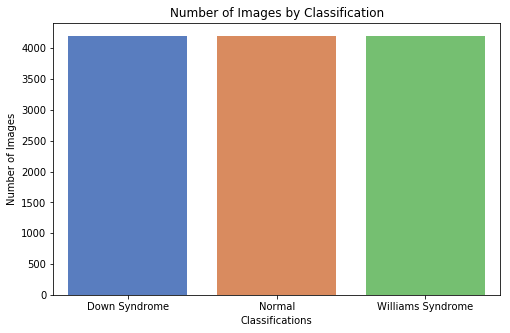

In [12]:
plt.figure(figsize = (8,5))

x_graph = ['Down Syndrome', 'Normal', 'Williams Syndrome']
y_graph = [number_of_images_each['normal'], number_of_images_each['down'], number_of_images_each['williams']]
image_count_graph = sns.barplot(x_graph, y_graph, orient = 'v', palette = 'muted')
image_count_graph.set_title('Number of Images by Classification')
image_count_graph.set_xlabel('Classifications')
image_count_graph.set_ylabel('Number of Images')

Text(0, 0.5, 'Number of Images')

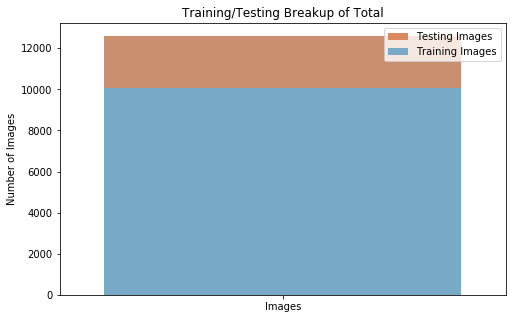

In [13]:
plt.figure(figsize = (8,5))

sns.barplot(x = ['Images'], y = [number_of_images_each['total']], color = '#D98B5F')
sns.barplot(x = ['Images'], y = [number_of_images_each['total']*.8], palette = 'Blues')

topbar = plt.Rectangle((0,0),1,1,fc="#D98B5F", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#78AAC8',  edgecolor = 'none')
plt.legend([topbar, bottombar], ['Testing Images', 'Training Images'])
plt.title('Training/Testing Breakup of Total')
plt.ylabel('Number of Images')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # splits the data into 75% training and 25% testing

In [15]:
y_cat_train = to_categorical(y_train, 3) # converts the y_train to categorical valules (one-hot encoding)
y_cat_test = to_categorical(y_test, 3) # converts the y_test to categorical valules (one-hot encoding)

In [16]:
X_train = X_train / X_train.max() # converts all the pixel values from between 0 and 255 to between 0 and 1
X_test = X_test / X_test.max() # converts all the pixel values from between 0 and 255 to between 0 and 1

In [17]:
model = Sequential() # generates a model instance

model.add(ZeroPadding2D((1,1),input_shape=(244, 244, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # last classification layer

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

model.compile(loss = 'categorical_crossentropy', # functions
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [18]:
model.summary() # provides a summary of the model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_14 (ZeroPaddi (None, 246, 246, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 244, 244, 64)      1792      
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 246, 246, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 244, 244, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 122, 122, 64)      0         
_________________________________________________________________
zero_padding2d_16 (ZeroPaddi (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 122, 122, 128)     73856     
__________

In [19]:
results = model.fit(X_train, y_cat_train, epochs = 100, callbacks = [tensorboard]) # trains the model to the training data for 100 epochs

Epoch 1/100
10079/10079 [==============================] - 116s 11ms/step - loss: 1.0984 - acc: 0.3384
Epoch 2/100
10079/10079 [==============================] - 108s 11ms/step - loss: 1.0979 - acc: 0.3489
Epoch 3/100
10079/10079 [==============================] - 108s 11ms/step - loss: 1.0957 - acc: 0.3733
Epoch 4/100
10079/10079 [==============================] - 108s 11ms/step - loss: 1.0831 - acc: 0.4025
Epoch 5/100
10079/10079 [==============================] - 109s 11ms/step - loss: 1.0623 - acc: 0.4326
Epoch 6/100
10079/10079 [==============================] - 108s 11ms/step - loss: 1.0482 - acc: 0.4619
Epoch 7/100
10079/10079 [==============================] - 108s 11ms/step - loss: 1.0365 - acc: 0.4701
Epoch 8/100
10079/10079 [==============================] - 108s 11ms/step - loss: 1.0259 - acc: 0.4783
Epoch 9/100
10079/10079 [==============================] - 108s 11ms/step - loss: 0.9996 - acc: 0.5060
Epoch 10/100
10079/10079 [==============================] - 108s 11ms/ste

10079/10079 [==============================] - 109s 11ms/step - loss: 0.0180 - acc: 0.9951
Epoch 80/100
10079/10079 [==============================] - 109s 11ms/step - loss: 0.0071 - acc: 0.9983
Epoch 81/100
10079/10079 [==============================] - 109s 11ms/step - loss: 0.0081 - acc: 0.9975
Epoch 82/100
10079/10079 [==============================] - 109s 11ms/step - loss: 0.0123 - acc: 0.9969
Epoch 83/100
10079/10079 [==============================] - 109s 11ms/step - loss: 0.0122 - acc: 0.9967
Epoch 84/100
10079/10079 [==============================] - 109s 11ms/step - loss: 0.0103 - acc: 0.9966
Epoch 85/100
10079/10079 [==============================] - 109s 11ms/step - loss: 0.0066 - acc: 0.9975
Epoch 86/100
10079/10079 [==============================] - 109s 11ms/step - loss: 0.0136 - acc: 0.9965
Epoch 87/100
10079/10079 [==============================] - 109s 11ms/step - loss: 0.0080 - acc: 0.9970
Epoch 88/100
10079/10079 [==============================] - 109s 11ms/step - 

In [20]:
model.metrics_names

['loss', 'acc']

In [22]:
model.evaluate(X_test, y_cat_test) # tests the model and finds accuracy

2520/2520 [==============================] - 11s 5ms/step


[0.5618563842760133, 0.9174603172710963]

In [23]:
predictions = model.predict_classes(X_test) # predicts classes on the testing data

In [24]:
print(classification_report(y_test, predictions)) # prints a classification report

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       855
           1       0.89      0.90      0.89       854
           2       0.90      0.90      0.90       811

   micro avg       0.92      0.92      0.92      2520
   macro avg       0.92      0.92      0.92      2520
weighted avg       0.92      0.92      0.92      2520



In [25]:
cm = confusion_matrix(y_test, predictions) # prints a confusion matrix
print(cm)

[[813  29  13]
 [ 23 767  64]
 [ 12  67 732]]


Text(133.82000000000005, 0.5, 'Predicted Values')

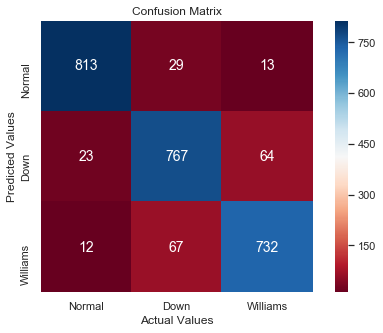

In [26]:
df_cm = pd.DataFrame(cm, index = [i for i in ['Normal', 'Down', 'Williams']], 
                     columns = [i for i in ['Normal', 'Down', 'Williams']])
plt.figure(figsize = (8,5))
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14}, cmap = 'RdBu', linecolor = 'black', square = True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0.5, 1.0, 'Accuracy vs. Epoch')

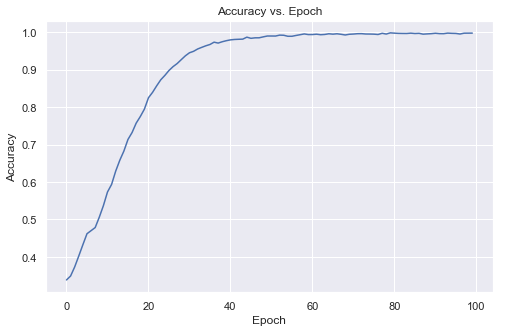

In [27]:
sns.set(font_scale=1)
plt.figure(figsize = (8,5))
plt.plot(results.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy') # displays a graph of accuracy vs epoch
plt.title('Accuracy vs. Epoch')

Text(0.5, 1.0, 'Loss vs. Epoch')

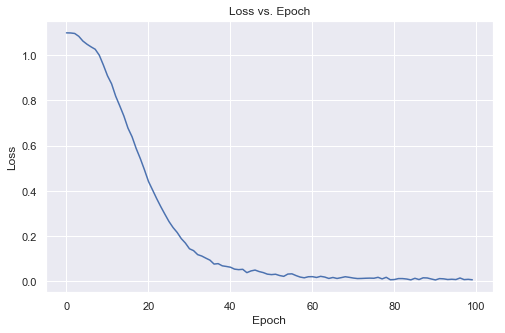

In [28]:
plt.figure(figsize = (8,5))
plt.plot(results.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss') # displays a graph of loss vs epoch
plt.title('Loss vs. Epoch')

Text(0, 0.5, 'Value')

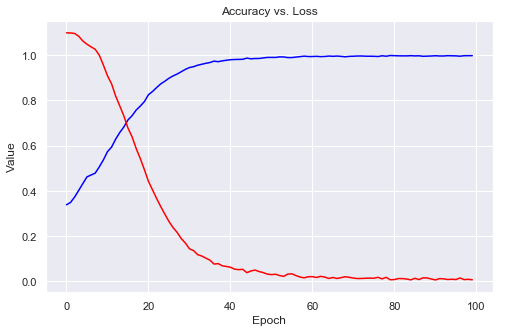

In [29]:
plt.figure(figsize = (8,5))
plt.plot(results.history['acc'], color = 'blue')
plt.plot(results.history['loss'], color = 'red')
plt.title('Accuracy vs. Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')

In [29]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

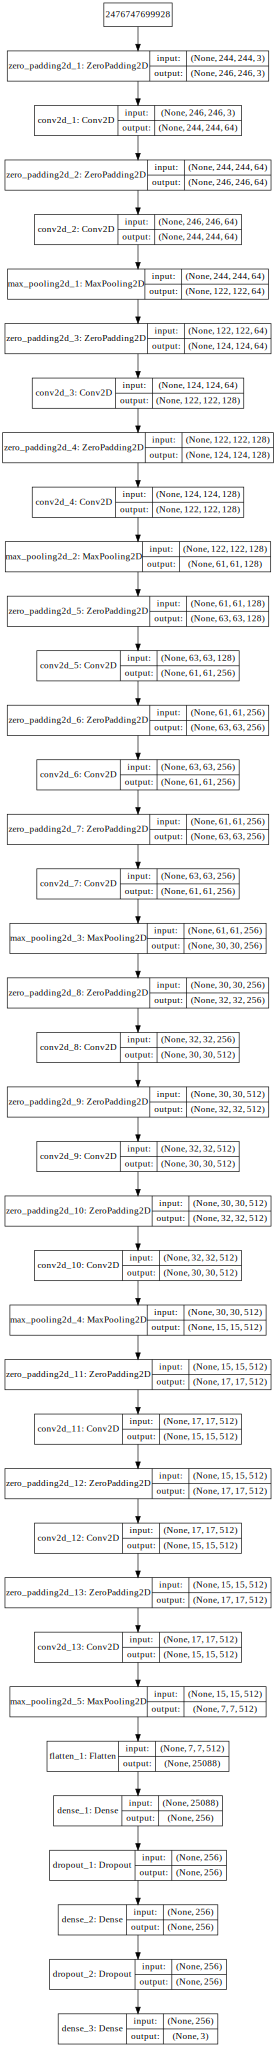

In [31]:
SVG(model_to_dot(model, show_shapes = True).create(prog='dot', format='svg'))

In [102]:
from keras.utils import plot_model
plot_model(model, to_file='Model_Diagram.png', show_shapes = True, rankdir = 'TB')

In [30]:
model.save('CNNGeneticDisorderClassifierTrainedModelVGG169107AccTensorBoard.h5') # saves the model

# Feature Extraction for Tensorboard Projector

In [46]:
verbose = 1

def get_image_features(image_file_name):
    ''' Runs the given image_file to VGG 16 model and returns the 
    weights (filters) as a 1, 4096 dimension vector '''
    image_features = np.zeros((1, 4096))
    # Magic_Number = 4096  > Comes from last layer of VGG Model

    # Since VGG was trained as a image of 224x224, every new image
    # is required to go through the same transformation
    image_photo = Image.open(image_file_name)                                      # reads the image into memory
    resized_image = image_photo.resize((244,244), PIL.Image.ANTIALIAS)   # resizes the image to 244 by 244
    resized_image.save(image_file_name,"PNG")                                      # saves the resized image

    im = skimage.data.load(image_file_name)     
    
    im = np.expand_dims(im, axis=0)

    image_features[0,:] = model.predict(im)[0]
    return image_features

image_features_list = []


normal_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Normal'
down_syndrome_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Down'
williams_syndrome_photo_base_path = r'C:\CDriveDataSet\AI4GenetXDataset\Williams'


normal_filenames = []
for f in listdir(normal_photo_base_path):
    normal_filenames.append(normal_photo_base_path + '\\' + f) # appends the path of the picture to a list


down_filenames = []
for f in listdir(down_syndrome_photo_base_path):
    down_filenames.append(down_syndrome_photo_base_path + '\\' + f) # appends the path of the picture to a list


williams_filenames = []
for f in listdir(williams_syndrome_photo_base_path):
    if f == 'desktop.ini':
        pass
    else:
        williams_filenames.append(williams_syndrome_photo_base_path + '\\' + f) # appends the path of the picture to a list


image_filenames = normal_filenames + down_filenames + williams_filenames # combines all the image paths together

for img in image_filenames:
    image_features=get_image_features(img)
    image_features_list.append(image_features)
    
    
image_features_arr=np.asarray(image_features_list)
image_features_arr = np.rollaxis(image_features_arr,1,0)
image_features_arr = image_features_arr[0,:,:]

np.savetxt('feature_vectors_400_samples.txt',image_features_arr)
#feature_vectors = np.loadtxt('feature_vectors.txt')
#pickle.dump(image_features_arr, open('feature_vectors_400_samples.pkl', 'wb'))

ValueError: could not broadcast input array from shape (3) into shape (4096)